# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

In [4]:
student_data = pd.DataFrame({'StudentID': ['1','2','3','4','5','6','7','8','9','10'], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3] })
student_data.set_index('StudentID', inplace = True)
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

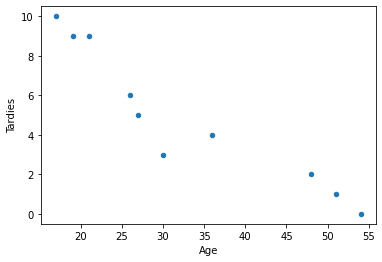

In [5]:
student_data.plot.scatter(x = 'Age', y = 'Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### Sí parece que hay una relación inversa entre edad y número de retrasos

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
student_data.corr() #una correlación casi del -1 entre ambas variables

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [7]:
student_data.cov() #La covarianza también es negativa

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [11]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [9]:
slope, intercept, r_value, p_value, std_err = linregress(x = student_data.Age, y = student_data.Tardies)
slope, intercept, r_value, p_value, std_err

(-0.2428207709159808,
 12.888803363135768,
 -0.9391626886887121,
 5.56665383455343e-05,
 0.03139728816158607)

Estoy usando una regresión lineal, creo que el outcome variable es Tardies

Plot your regression model on your scatter plot.

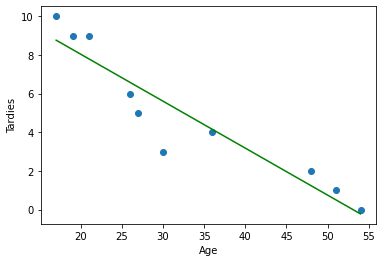

In [14]:
plt.scatter(x = student_data.Age, y = student_data.Tardies)

x = [student_data.Age.min(),student_data.Age.max()]
y = [student_data.Age.min() * slope + intercept,student_data.Age.max() * slope + intercept]
plt.plot(x,y, color='g')
plt.xlabel('Age')
plt.ylabel('Tardies');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

### Sí es un buen predictor de los retrasos y estoy 99% seguro que es el caso dado el p-value

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
vehicles = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
vehicles_small = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles_small.corr()

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


### La variable más importante para determinar es barriles de combustible al año y la menos importante es el año (de las columnas seleccionadas)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [24]:
import statsmodels.api as sm

In [29]:
x=sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
modelo_autos = sm.OLS(vehicles['CO2 Emission Grams/Mile'], x).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [30]:
print(modelo_autos.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:19:48   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Creo que otra vez los barriles de combustible por año son los que afectan más porque tienen los valores más altos en coef, y t

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
parties = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

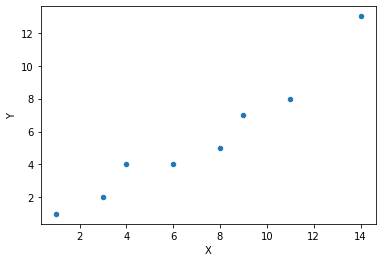

In [39]:
parties.plot.scatter(x = 'X', y = 'Y');

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [40]:
# Parece que sí hay una relación positiva entre las dos variables

slope, intercept, r_value, p_value, std_err = linregress(x = parties.X, y = parties.Y)
slope, intercept, r_value, p_value, std_err

(0.8484848484848485,
 -0.43939393939393945,
 0.9652303546573691,
 0.00010236374464090686,
 0.09380896778286217)

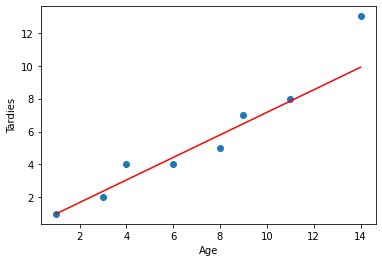

In [55]:
plt.scatter(x = parties.X, y = parties.Y)

x = [parties.X.min(), parties.X.max()]
y = [parties.X.min() * slope + intercept, parties.X.max() * slope + intercept]
plt.plot(x,y, color='r')
plt.xlabel('Age')
plt.ylabel('Tardies');

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [53]:
parties_clean = parties[parties['X'] < 14]
parties_clean

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [54]:
slope_c, intercept_c, r_value_c, p_value_c, std_err_c = linregress(x = parties_clean.X, y = parties_clean.Y)
slope_c, intercept_c, r_value_c, p_value_c, std_err_c

(0.6842105263157895,
 0.32330827067669166,
 0.971278116825086,
 0.0002644056885656864,
 0.07496206665031292)

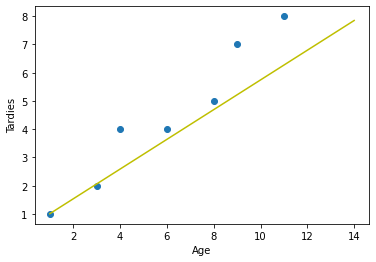

In [56]:
plt.scatter(x = parties_clean.X, y = parties_clean.Y)

x = [parties_clean.X.min(), parties.X.max()]
y = [parties_clean.X.min() * slope_c + intercept_c, parties_clean.X.max() * slope_c + intercept_c]
plt.plot(x,y, color='y')
plt.xlabel('Age')
plt.ylabel('Tardies');

In [52]:
print(f'The p value for the whole data frame is {round(p_value, 4)} and the p-value without the outliers is {round(p_value_clean, 4)}')

The p value for the whole data frame is 0.0003 and the p-value without the outliers is 0.0003


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#La verdad no veo ningún cambio limpiando o no el outlier